In [1]:
import pandas as pd
from OptimalPanel.bayesian import ThompsonSamplerRL

In [2]:
df = pd.read_csv('input/clean_annual_wb_fred.csv')
df = df[df['year'] <= 2019]
df = df.rename(columns={"economy" : "isocode"})

df["date"] = pd.to_datetime(df["year"].astype(str) + "-01-01")
df.drop(columns="year", inplace=True)  # optional cleanup

# Selecting relevant columns
static_cols = ['isocode', 'date', '1DLGDP']
lag_cols = df.columns[df.columns.str.endswith('_L1') | df.columns.str.endswith('_L2')]
cols_to_include = static_cols + lag_cols.to_list()
df = df[cols_to_include].copy()
df = df.reset_index(drop=True)
df.drop(columns=['GDPGR_L1', '1DGDPGR_L2'], inplace=True)
print("Number of units: ", df["isocode"].nunique())
df

Number of units:  150


,isocode,date,1DLGDP,1DLGDP_L1,1DLGDP_L2,LEND_L2,RRATE_L2,1DDEBT_L2,2DLGOVCON_L1,2DLGFKF_L1,...,FEDFUNDS_L2,WUI_L1,WUI_L2,1DUST10_L2,1DUSYIELD_L1,1DUSRRATE_L2,1DFEDFUNDS_L2,1DLWTI_L2,2DLWTI_L1,1DWUI_L1
0,AFE,1980-01-01,5.318699,2.888342,1.476127,-1047.943026,3233.626846,942.444337,-0.238242,-2.852747,...,7.94,0.127085,0.049690,0.99,0.446788,0.790596,2.40,3.802009,37.321956,0.077395
1,AFE,1981-01-01,3.934116,5.318699,2.888342,-696.596459,3302.639800,2367.068244,1.894273,5.105715,...,11.20,0.062158,0.127085,1.02,2.251840,0.699691,3.26,41.123965,10.052287,-0.064928
2,AFE,1982-01-01,0.315334,3.934116,5.318699,-773.999721,3305.102706,2064.786489,-1.640130,2.037248,...,13.35,0.090546,0.062158,2.00,3.496616,1.173846,2.15,51.176252,-53.088738,0.028388
3,AFE,1983-01-01,0.039939,0.315334,3.934116,-1061.529652,3261.282561,894.782927,4.062284,-10.022484,...,16.39,0.092837,0.090546,2.49,0.737551,1.535289,3.04,-1.912486,-6.715538,0.002292
4,AFE,1984-01-01,3.310964,0.039939,0.315334,-1080.113180,3256.543016,803.989451,-2.333217,-8.376349,...,12.24,0.099054,0.092837,-0.91,-1.340747,-0.811175,-4.15,-8.628025,-1.503855,0.006217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,ZWE,2015-01-01,2.003446,1.473631,3.146699,9.740000,1.525435,-43.697495,49.351208,38.816294,...,0.11,0.147042,0.222608,0.55,-0.290000,0.301093,-0.03,3.888341,-8.782777,-0.075565
5996,ZWE,2016-01-01,0.896921,2.003446,1.473631,9.467500,8.787605,-40.893438,-3.369751,-6.577338,...,0.09,0.268378,0.147042,0.19,1.170000,0.324125,-0.02,-4.894436,-60.099289,0.121336
5997,ZWE,2017-01-01,3.999218,0.896921,2.003446,8.541771,8.144427,-38.118247,-2.389474,-4.906594,...,0.13,0.214639,0.268378,-0.40,0.430000,-0.022944,0.04,-64.993725,52.904802,-0.053739
5998,ZWE,2018-01-01,4.888413,3.999218,0.896921,7.113333,4.998563,-43.237287,1.207511,3.889627,...,0.39,0.185867,0.214639,-0.30,-1.670000,-0.168375,0.26,-12.088924,28.589441,-0.028772


In [3]:
unit_col = 'isocode'
time_col = 'date'
target_col = '1DLGDP'
target_unit = 'ESP'
donor_units = [unit for unit in df["isocode"].unique() if unit != target_unit]
feature_cols = df.columns.difference([unit_col, time_col, target_col])
forecast_times = list(pd.date_range(start="2010-01-01", end="2019-01-01", freq="YS"))
total_epochs = 800

In [4]:
ts = ThompsonSamplerRL(
    df=df,
    unit_col=unit_col,
    time_col=time_col,
    target_col=target_col,
    feature_cols=feature_cols,
    target_unit=target_unit,
    donor_units=donor_units,
    similarities=None,
    forecast_times=forecast_times
)

ts.train(
    n_epochs=total_epochs,
    save=True,
    save_path=f"results/annual/thompson/results_{target_unit}.pkl"
)

Epoch 0 — MSE: 5.8501, Bundle Size: 71
Epoch 10 — MSE: 5.4451, Bundle Size: 68
Epoch 20 — MSE: 5.4567, Bundle Size: 82
Epoch 30 — MSE: 5.5493, Bundle Size: 68
Epoch 40 — MSE: 5.4354, Bundle Size: 75
Epoch 50 — MSE: 5.6217, Bundle Size: 86
Epoch 60 — MSE: 4.5259, Bundle Size: 70
Epoch 70 — MSE: 5.3700, Bundle Size: 65
Epoch 80 — MSE: 4.7515, Bundle Size: 78
Epoch 90 — MSE: 4.6647, Bundle Size: 74
Epoch 100 — MSE: 5.5332, Bundle Size: 77
Epoch 110 — MSE: 4.7902, Bundle Size: 76
Epoch 120 — MSE: 5.7549, Bundle Size: 90
Epoch 130 — MSE: 5.7932, Bundle Size: 71
Epoch 140 — MSE: 6.4391, Bundle Size: 69
Epoch 150 — MSE: 5.5678, Bundle Size: 78
Epoch 160 — MSE: 5.8503, Bundle Size: 66
Epoch 170 — MSE: 5.7733, Bundle Size: 75
Epoch 180 — MSE: 6.0790, Bundle Size: 87
Epoch 190 — MSE: 5.1086, Bundle Size: 59
Epoch 200 — MSE: 5.2180, Bundle Size: 75
Epoch 210 — MSE: 5.0916, Bundle Size: 78
Epoch 220 — MSE: 5.5110, Bundle Size: 71
Epoch 230 — MSE: 5.9179, Bundle Size: 79
Epoch 240 — MSE: 4.9528, Bu

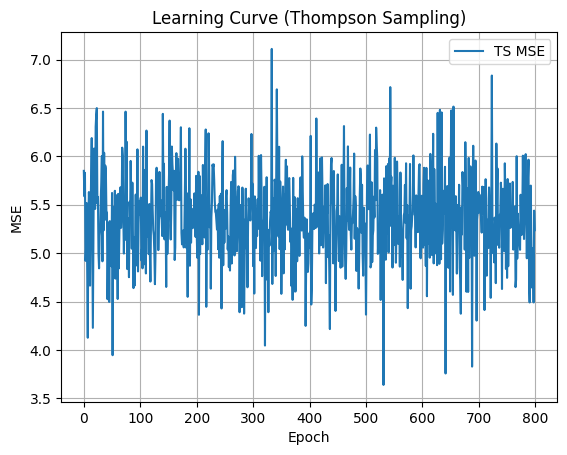

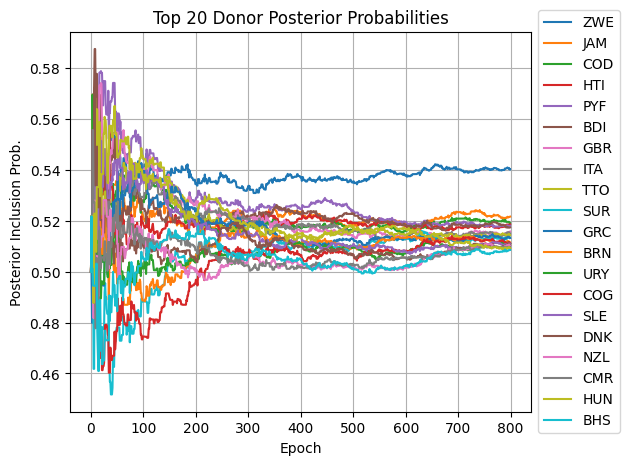

In [8]:
ts.plot_learning_curve()
ts.plot_donor_probs(top_n=20)